# 4장 엣지 검출

영상에서 경계에 해당하는 곳은 물체의 내부나 배경은 명암값에 급격하 변화가 발생할 수 있다. 경계(edge)는 픽셀 값이 급격하게 변경되는 부분으로 픽셀 값의 변화율을 이용하여 엣지를 찾을 수 있다. 2차원 디지털 영상에서 픽셀 값의 변화율을 근사화하여 구하는 방법과 다양한 응용을 학습한다. 영상에서 경계(edge)를 검출하는 것은 배경과 전경을 분리하는 데 가장 기본적인 작업이다. 경계 검출은 객체 인식과 추적의 첫걸음에 해당하는 중요한 작업이다. 영상 필터는 영상을 흐릿하게 만드는데 그 반대로 영상의 경계를 선명하게 만드는 것을 샤프닝(sharping)이라고 한다.

## 미분 필터

경계를 검출하려면 픽셀 값의 변화가 갑자기 크게 일어나는 지점을 찾아내야 하는데 이것은 연속된 픽셀 값에 미분 영상을 하면 알 수 있다. 영상 속의 픽셀 데이터는 현실과 같은 연속된 공간이 아니므로 이산화시켜서 근사 값으로 간소화해야 한다. 

$$
Gx=\frac{\partial f(x,y)}{\partial x} \approx f_{x+1,y} - f_{x,y}
$$

$$
Gy=\frac{\partial f(x,y)}{\partial y} \approx f_{x,y+1} - f_{x,y}
$$

$x$축과 $y$축의 각 방향에서 다음 픽셀의 값에서 현재 픽셀의 값을 빼는 것이다. 

영상에 대한 미분 연산을 컨볼루션 커널로 만들면 다음과 같다.

$$Gx=[-1, 1]\quad Gy=\begin{bmatrix} -1 \\ 1 \end{bmatrix}$$

각 방향으로 미분 마스크를 생성해서 컨볼루션을 수행한다. $x$방향 미분 마스크는 세로 방향 경계를 검출하고 $y$방향 미분 마스크는 가로 방향 미분 마스크를 검출하는 것을 알 수 있다. 근사 값이긴 하지만 미분으로 얻은 엣지 정보는 $x$축과 $y$축에 대한 값의 변화를 나타내는 것이고 이것을 기울기(gradient)라고 한다. 두 값을 이용하면 엣지의 강도(magnitude)와 방향(direction)이라는 두 가지 중요한 정보를 추가로 얻을 수 있는데 아래의 식으로 설명한다.

$$\text{magnitude}=\sqrt{G_{x}^2+G_{y}^2}$$

$$\text{direction}(\theta)=\arctan{\frac{G_y}{G_x}}$$

$G_x$, $G_y$로 강도와 방향을 어떻게 구하는지 그림으로 설명하고 있다. 그레이디언트의 방향과 엣지의 방향은 같은 방향을 가리키는 것이 아니라 서로 수직이라는 것이다. 이 값들은 영상의 특징을 묘사하는 중요한 단서가 되고 영상끼리 얼마나 비슷한지도 알아낼 수 있다.

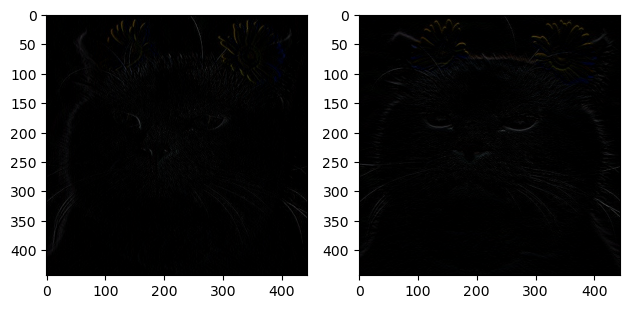

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel_gx = np.array([[-1, 1]])
kernel_gy = np.array([[-1], [1]])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=100)
ax1.imshow(edge_gx)
ax2.imshow(edge_gy)
fig.tight_layout()
plt.show()

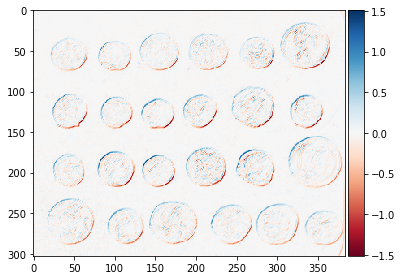

In [27]:
import numpy as np
from skimage import data, io
from scipy import ndimage

coins = data.coins() / 255
diff2d = np.array([
    [0, 1, 0], [1, 0, -1], [0, -1, 0]
])
coin_edges = ndimage.convolve(coins, diff2d)
io.imshow(coin_edges)

## 로버츠 교차 필터

1963년 로렌스 로버츠(Lawrence Roberts)는 기분 미분 커널을 개선한 커널을 제안했다. 커널은 대각선 방향으로 1과 -1을 배치해서 사선 경게 검출 효과를 높였지만 노이즈에 민감하고 엣지 강도가 약한 단점이 있다.

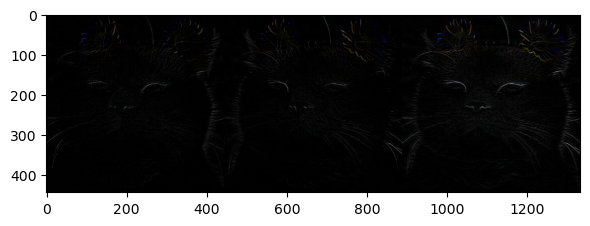

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel_gx = np.array([[1, 0], [0, -1]])
kernel_gy = np.array([[0, 1], [-1, 0]])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

fig, ax = plt.subplots(dpi=100)
merged = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
ax.imshow(merged)
fig.tight_layout()
plt.show()

## 프리윗 필터

주디스 프리윗(Judith M. S. Prewitt)이 개발한 프리윗 마스크는 각 방향으로 차분을 세 번 계산하도록 배치해 엣지 강도가 강하고 수직과 수평 엣지를 동등하게 찾는 장점이 있지만 대각선 검출에 약하다.

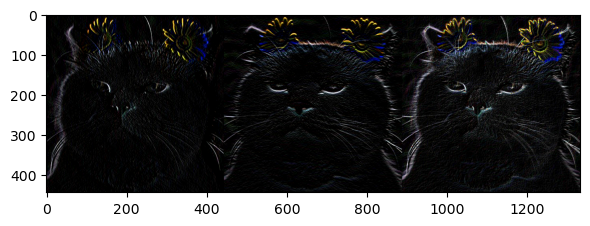

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel_gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

fig, ax = plt.subplots(dpi=100)
merged = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
ax.imshow(merged)
fig.tight_layout()
plt.show()

## 소벨 필터

1968년 어윈 소벨(Irwin Sobel)은 중심 픽셀의 차분 비중을 두 배로 주어 수평, 수직 대각선 경계 검출에 모두 강한 마스크를 제안했다. 소벨 마스크는 대표적인 1차 미분 마스크이다. 

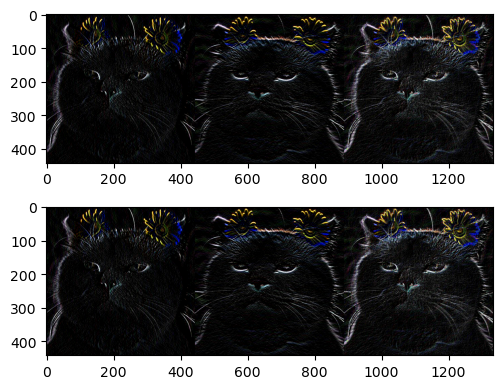

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel_gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

sobel_x = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, -1, 0, 1, ksize=3)

fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=100)
merged1 = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
merged2 = np.hstack((sobel_x, sobel_y, sobel_x + sobel_y))
ax1.imshow(merged1)
ax2.imshow(merged2)
fig.tight_layout()
plt.show()

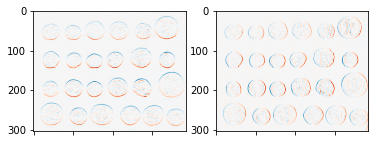

In [28]:
import numpy as np
from skimage import data, io
from scipy import ndimage

coins = data.coins() / 255

# 수평 가장자리를 찾기 위한 열 벡터 (수직)
hdiff = np.array([[1], [0], [-1]])
hsobel = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])
vsobel = hsobel.T

def reduce_xaxis_labels(ax, factor):
    """ x 축에 몰리지 않도록, 모든 i 번째 레이블만 보여준다.
        예) factor = 2는 처음부터 매 초마다 x 축 레이블을 그린다.

    매개변수
    ----------
    ax : 맷플롯립 그래프 축
    factor : 정수, x축 레이블 수를 줄이기 위한 요소
    """
    plt.setp(ax.xaxis.get_ticklabels(), visible=False)
    for label in ax.xaxis.get_ticklabels()[::factor]:
        label.set_visible(True)

coins_h = ndimage.convolve(coins, hsobel)
coins_v = ndimage.convolve(coins, vsobel)

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(coins_h, cmap=plt.cm.RdBu)
axes[1].imshow(coins_v, cmap=plt.cm.RdBu)
for ax in axes:
    reduce_xaxis_labels(ax, 2)

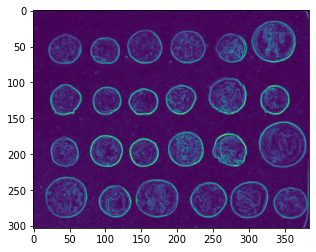

In [29]:
coins_sobel = np.sqrt(coins_h**2 + coins_v**2)
plt.imshow(coins_sobel, cmap='viridis')

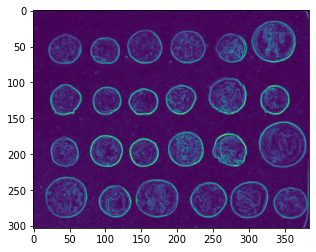

In [30]:
hsobel = np.array([[ 1,  2,  1],
                   [ 0,  0,  0],
                   [-1, -2, -1]])

vsobel = hsobel.T

hsobel_r = np.ravel(hsobel)
vsobel_r = np.ravel(vsobel)

def sobel_magnitude_filter(values):
    h_edge = values @ hsobel_r
    v_edge = values @ vsobel_r
    return np.hypot(h_edge, v_edge)

sobel_mag = ndimage.generic_filter(coins, sobel_magnitude_filter, size=3)
plt.imshow(sobel_mag, cmap='viridis')

## 샤르 필터

소벨 필터는 커널의 크기가 작거나 큰 경우 중심에서 멀어질수록 엣지 방향성의 정확도가 떨어진다. 이를 개선한 필터가 샤르(Scharr) 필터이다.

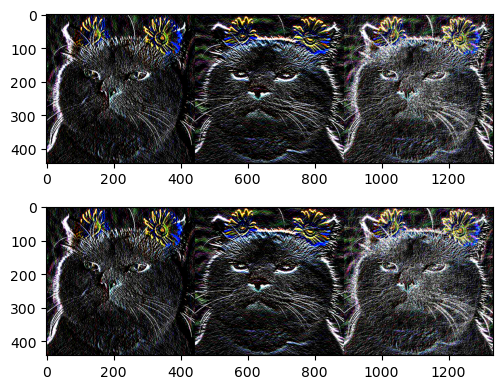

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel_gx = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
kernel_gy = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

sobel_x = cv2.Scharr(img, -1, 1, 0)
sobel_y = cv2.Scharr(img, -1, 0, 1)

fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=100)
merged1 = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
merged2 = np.hstack((sobel_x, sobel_y, sobel_x + sobel_y))
ax1.imshow(merged1)
ax2.imshow(merged2)
fig.tight_layout()
plt.show()

## 라플라시안 필터

라플라시안(Laplacian) 필터는 대표적인 2차 미분 마스크이다.

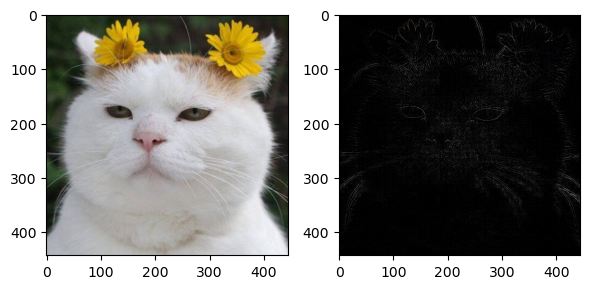

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

edge = cv2.Laplacian(img, -1)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=100)
ax1.imshow(img)
ax2.imshow(edge)
fig.tight_layout()
plt.show()

## 캐니 엣지

1986년 존 캐니(John F. Canny)가 제안한 캐니 엣지 알고리즘은 한 가지 필터가 아닌 4단계의 알고리즘을 적용해 잡음에 강한 엣지 검출기이다. 캐니는 기존의 휴리스틱한 접근 방식에서 엣지 검출을 최적화 문제로 취급하였다. 그는 엣지 알고리즘이 갖추어야 할 세 가지 기준을 제시하였다.

1. 최소 오류율: 거짓 긍정과 거짓 부정이 최소여야 한다. 즉, 없는 엣지가 생성되거나 있는 엣지를 못 찾는 경우를 최소로 유지해야 한다.
2. 위치 정확도: 검출된 엣지는 실제 엣지의 위치와 가급적 가까워야 한다.
3. 엣지 두께: 실제 엣지에 해당하는 곳에는 한 두께의 엣지만 생성해야 한다.

캐니 엣지 검출과정은 다음과 같다.

1. 노이즈 제거(noise reduction): $5 \times 5$ 가우시안 블러링 필터로 노이즈를 제거함.
2. 엣지 그레디언트 방향 계산: 소벨 마스크로 엣지 및 그레디언트 방향을 검출함.
3. 비최대치 억제(non-maximum suppression): 그레디언트 방향에서 검출된 엣지 중 가장 큰 값만 선택하고 나머지는 제거함. 
4. 이력 스레시홀딩(hysteresis thresholding): 두 개의 경계 값을 지정해서 경계 영역에 있는 픽셀들 중 큰 경계 값 밖의 픽셀과 연결성이 없는 픽셀을 제거함.

비최대 억제는 자신의 이웃보다 크지 않은 화소를 억제한다. 억제란 엣지가 아닌 것으로 결정함을 뜻하며 엣지의 방향을 기준으로 두 이웃 화소를 조사하여 엣지의 강도가 두 이웃보다 크면 엣지가 되고 그렇지 않으면 억제된다. 지역 최대점만으로 엣지를 검출하므로 얇은 두께의 엣지 영상을 생성한다. 

캐니 알고리즘은 두 개의 임계값 $T_{low}$와 $T_{high}$를 이력 임계값 방법을 적용한다. 엣지 추적은 $T_{high}$를 넘는 화소에서 시작한다. 신뢰도가 높은 화소만 엣지 추적을 시작할 권리를 얻는다. 시작 화소가 정해지면 $T_{low}$를 넘는 화송를 대상으로 엣지를 추적한다.

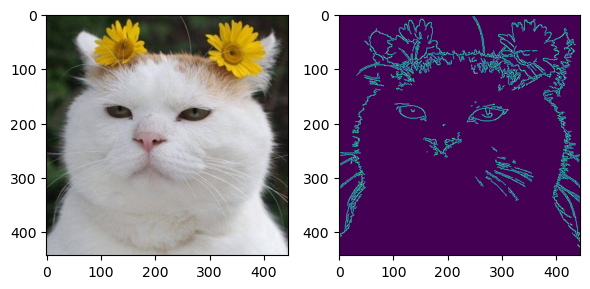

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

edge = cv2.Canny(img, 100, 200)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=100)
ax1.imshow(img)
ax2.imshow(edge)
fig.tight_layout()
plt.show()

3.2764020559553018 0.05751523807048265


C:\Users\ryu\anaconda3\envs\vision\lib\site-packages\ipykernel_launcher.py:99: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_in" which is no longer supported as of 3.3 and will become an error two minor releases later


<Figure size 432x288 with 0 Axes>

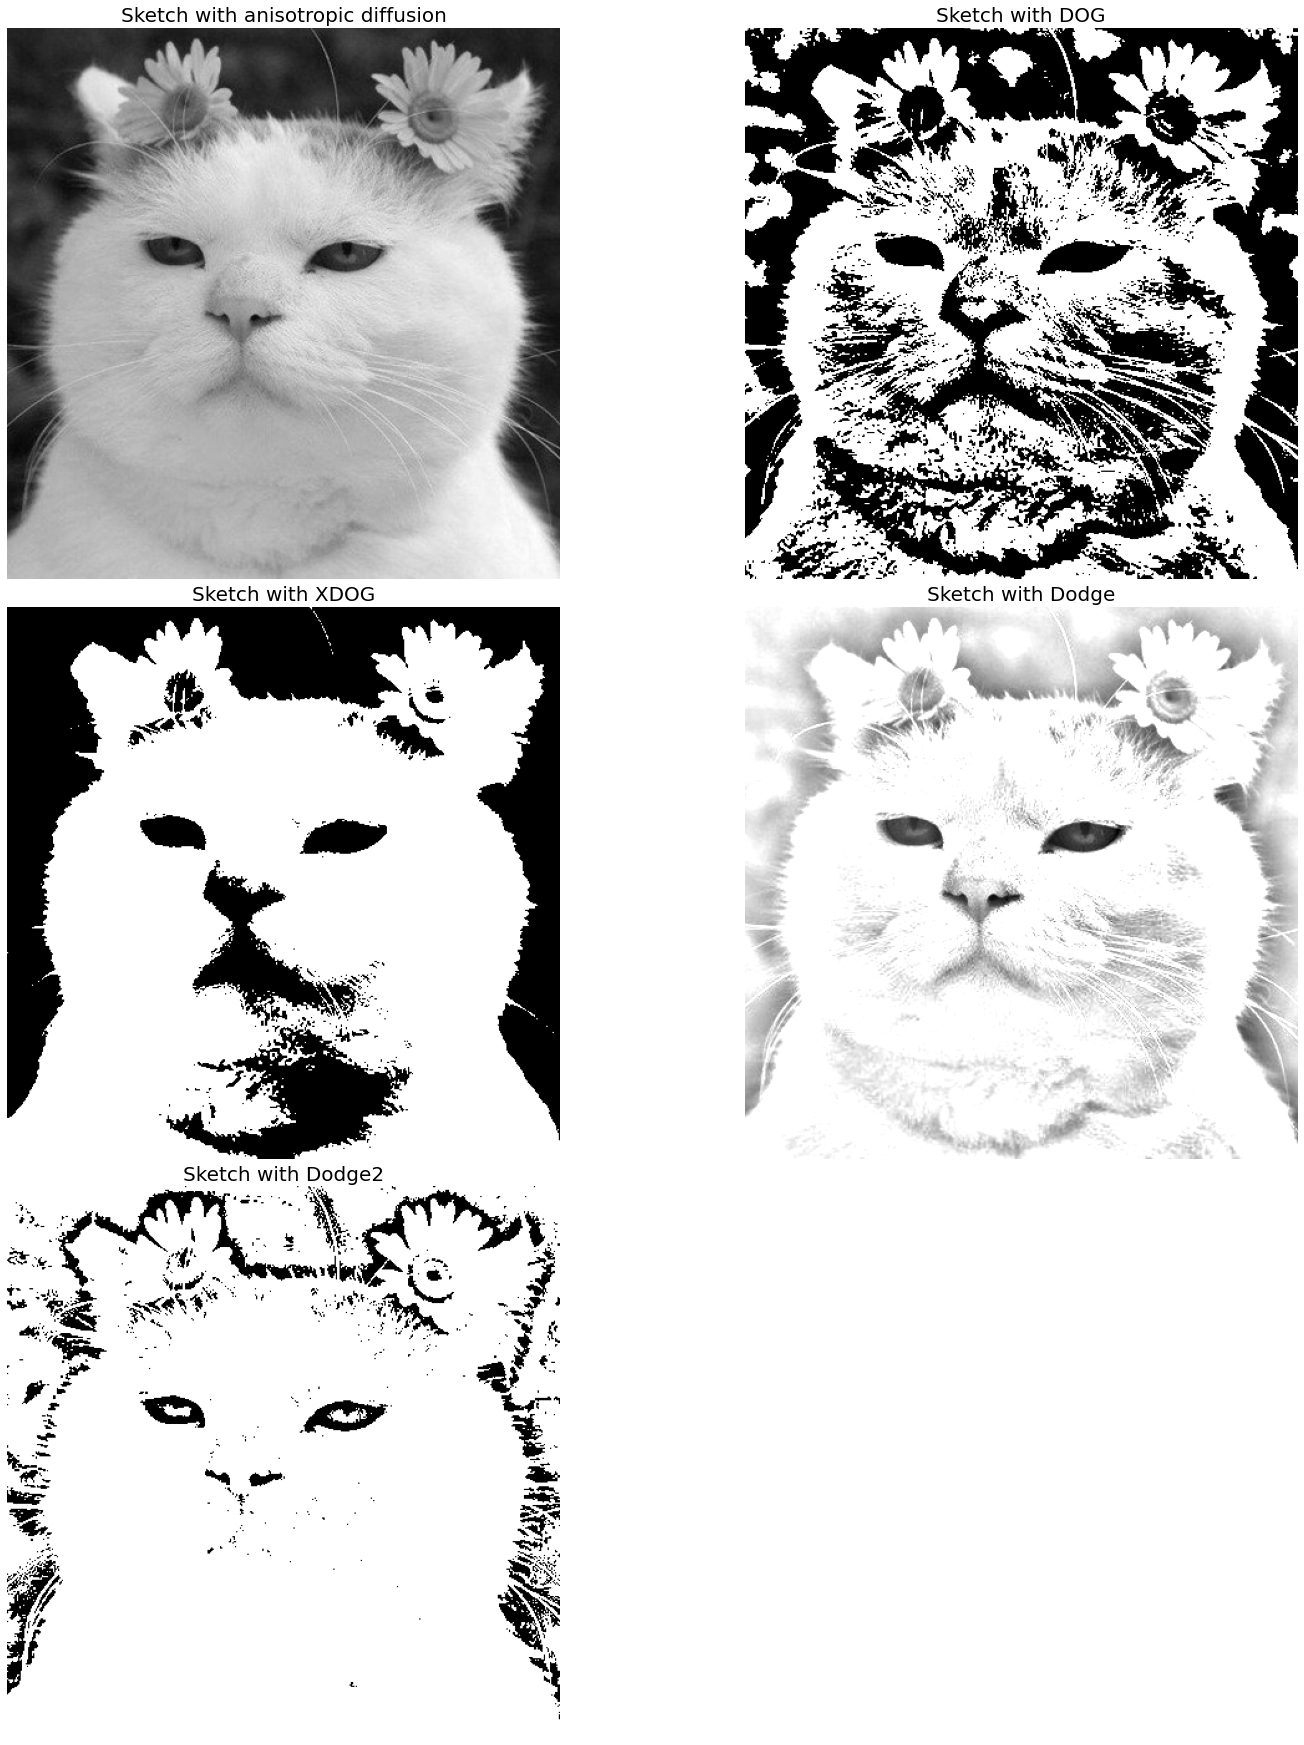

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, img_as_float, filters

# from medpy.filter.smoothing import anisotropic_diffusion


def normalize(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

def sketch(img, edges):
    output = np.multiply(img, edges)
    output[output > 1] = 1
    output[edges == 1] = 1
    #output = normalize(output)
    return output

def edges_with_dodge2(img):
    img_blurred = filters.gaussian(util.invert(img), sigma=5)
    output = np.divide(img, util.invert(img_blurred) + 0.001) # avoid division by zero
    print(np.max(output), np.min(output))
    output = normalize(output)
    thresh = filters.threshold_otsu(output)
    output = output > thresh
    return output


def sketch_with_dodge(img):
    orig = img
    blur = filters.gaussian(util.invert(img), sigma=20)
    result = blur / util.invert(orig) 
    result[result > 1] = 1
    result[orig == 1] = 1
    return result

def edges_with_DOG(img, k = 200, gamma = 1):
    sigma = 0.5
    output = filters.gaussian(img, sigma=sigma) - gamma*filters.gaussian(img, sigma=k*sigma)
    output[output > 0] = 1
    output[output < 0] = 0 
    return output

def sketch_with_XDOG(image, epsilon=0.01):
    """
    Computes the eXtended Difference of Gaussians (XDoG) for a given image. This 
    is done by taking the regular Difference of Gaussians, thresholding it
    at some value, and applying the hypertangent function the the unthresholded
    values.
    image: an n x m single channel matrix.
    epsilon: the offset value when computing the hypertangent.
    returns: an n x m single channel matrix representing the XDoG.
    """
    phi = 10

    difference = edges_with_DOG(image, 200, 0.98).astype(np.uint8)
    #difference = sketch(image, difference)
    #difference = normalize(difference)  

    for i in range(0, len(difference)):
        for j in range(0, len(difference[0])):
            if difference[i][j] >= epsilon:
                difference[i][j] = 1
            else:
                ht = np.tanh(phi*(difference[i][j] - epsilon))
                difference[i][j] = 1 + ht
    difference = normalize(difference)  
    return difference

def plot_sketches(img_file):
    img = color.rgb2gray(io.imread(img_file))
    plt.figure(figsize=(20, 25))
    output_dog = sketch(img, edges_with_DOG(img, k=25))
    output_xdog = sketch_with_XDOG(img)
    output_dodge = sketch_with_dodge(img)
    output_dodge2 = sketch(img, edges_with_dodge2(img))
    plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05) 
    plt.subplot(321)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original Gray-scale image', size=20)
    plt.title('Sketch with anisotropic diffusion', size=20)
    plt.subplot(322)
    plt.imshow(output_dog)
    plt.axis('off')
    plt.title('Sketch with DOG', size=20)
    plt.subplot(323)
    plt.imshow(output_xdog)
    plt.axis('off')
    plt.title('Sketch with XDOG', size=20)
    plt.subplot(324)
    plt.imshow(output_dodge)
    plt.axis('off')
    plt.title('Sketch with Dodge', size=20)
    plt.subplot(325)
    plt.imshow(output_dodge2)
    plt.axis('off')
    plt.title('Sketch with Dodge2', size=20)
    #plt.show()
    plt.savefig(img_file.split('.')[0] + '_sketches_all.png', bbox_in='tight')

plt.gray()
img = 'img/cat-01.jpg'
plot_sketches(img)

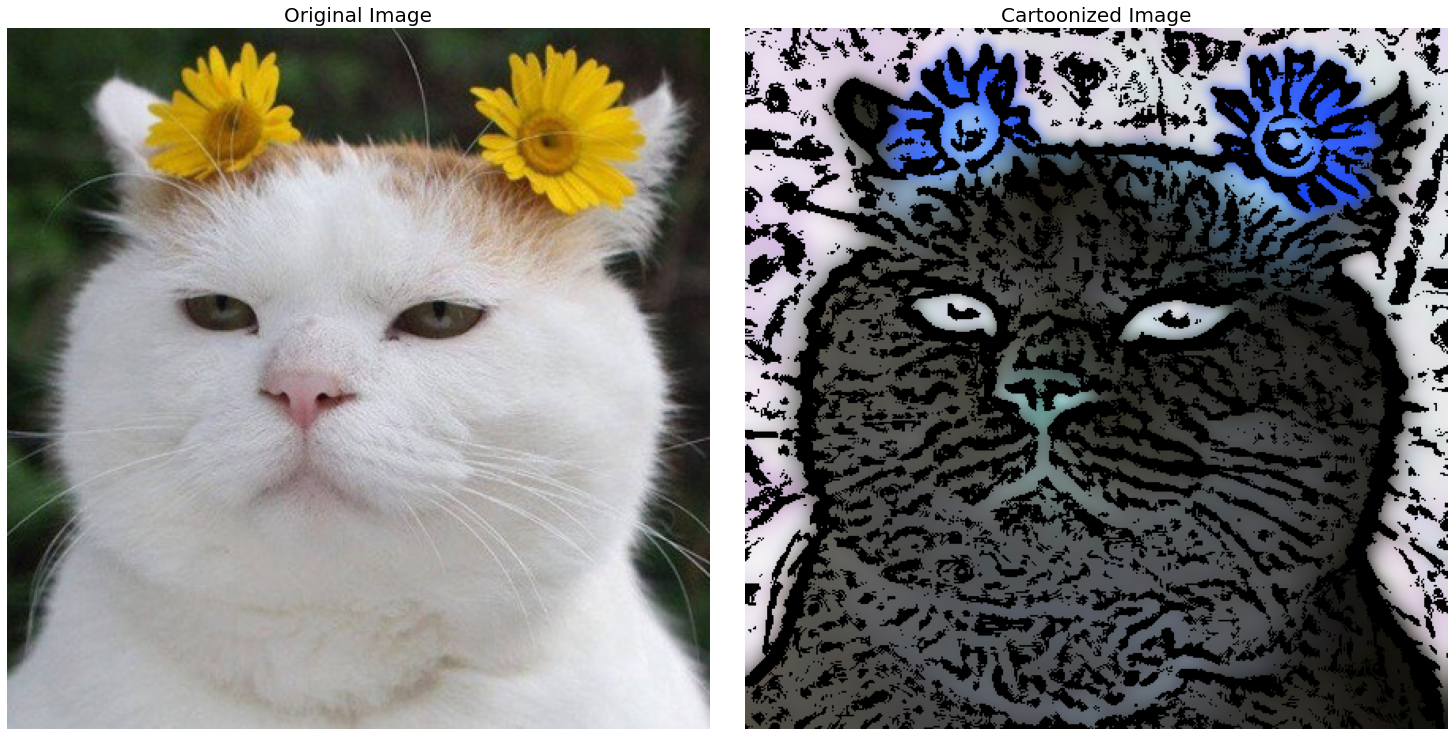

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

num_down = 2  # number of downsampling steps
num_bilateral = 7  # number of bilateral filtering steps

    
img = plt.imread('./img/cat-01.jpg')
w, h, _ = img.shape
  
# downsample image using Gaussian pyramid
img_color = np.copy(img)
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)
 
# repeatedly apply small bilateral filter instead of applying one large filter
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(
        img_color, d=9,
        sigmaColor=0.1,
        sigmaSpace=0.01
    )

# upsample image to original size
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)
    
img_color = cv2.resize(img_color, (img.shape[1], img.shape[0]))

# convert to grayscale and apply median blur
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(
    (255*img_gray).astype(np.uint8), 7
) # convert float32 to uint8

# detect and enhance edges
img_edge = cv2.adaptiveThreshold(
    (255*img_blur).astype(np.uint8), 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,  #ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV,
    blockSize=11,
    C=0
)

# convert back to color, bit-AND with color image
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)

img_cartoon = cv2.bitwise_and((255*img_color).astype(np.uint8), img_edge)

# display
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image', size=20)
plt.subplot(122)
plt.imshow(img_cartoon)
plt.axis('off')
plt.title('Cartoonized Image', size=20)
plt.show()

## 모폴로지

모폴로지(morphology)는 형태학이란 뜻으로 영상 분야에서 노이즈 제거, 구멍 메꾸기, 연결되지 않은 경계 이어붙이기 등 형태학적 관점에서 영상 연산을 뜻한다. 모폴리지는 주로 형태를 다루는 연산이므로 바이너리 이미지를 대상으로 한다. 대표적인 연산은 침식과 팽창이며 이 둘의 결합한 열림과 닫힘 연산이 있다.

### 침식 연산

침식(erosion)은 원래 있던 객체의 영역을 깍아 내는 연산이다. 침식 연산을 위해서 구조화 요소(structuring element)라는 0과 1로 채워진 커널이 필요한데, 1이 채워진 모양에 따라 사각형, 타원형 십자형 등을 사용할 수 있다. 침식 연산은 구조화 요소 커널을 입력 영상에 적용해서 1로 채워진 영역을 온전히 올려 놓을 수 없으며 해당 픽셀을 0으로 변경한다. 침식 연산은 큰 물체는 주변을 깎아서 작게 만들지만 작은 객체는 아예 사라지게 만들 수 있으므로 아주 작은 노이즈를 제거하거나 원래는 따로 떨어진 물체인데 겹쳐서 하나의 물체로 보일 때 서로를 떼어내는 데도 효과적이다.

### 팽창 연산

팽창(dilatation)은 침식과는 반대로 영상 속 사물의 주변을 덧붙여서 영역을 더 확장하는 연산이다. 침식 연산과 마찬가지로 구조화 요소 커널을 입력 영상에 적용해서 1로 채워진 영역이 온전히 덮이지 않으며 1로 채워 넣는다. 

침식과 팽창 연산은 밝은 부분이나 어두운 부분의 점 노이즈를 없애는 데 효과적이지만, 원래 모양이 홀쭉해지거나 뚱뚱해지는 변형이 일어난다. 그런데 침식과 팽창 연산을 조합하면 원래의 모양을 유지하면서 노이즈만 제거할 수 있다. 침식 연산을 적용하고 나서 팽창 연산을 적용하는 것을 열림(opening) 연산이라고 한다. 열림 연산은 주변보다 밝은 노이즈 제거에 효과적이면서 맞닿아 있는 것으로 보이는 독립된 개체를 분리하거나 돌출된 픽셀을 제거하는 데 좋다. 그와 반대로 팽창 연산을 먼저 적용하고 침식 연산을 나중에 적용하는 연산을 닫힘(closing) 연산이라고 하고 주변보다 어두운 노이즈 제거에 효과적이면서 끊어져 보이는 개체를 연결하거나 구멍을 메우는 데 좋다. 

팽창한 결과에서 침식한 결과를 빼면 경계만 얻게 되는데, 앞서 살펴본 경계 검출과 비슷한 결과를 얻을 수 있어서 이것을 그레디언트 연산이라고 한다. 또한 원본에서 열림 연산 결과를 빼면 밝기 값이 크게 튀는 영역을 갖오할 수 있고 닫힘 연산 결과에서 원본을 빼면 어두운 부분을 강조할 수 있다. 이것을 탑햇(top hat)과 블랙햇(black hat) 연산이고 한다.

In [ ]:
# import numpy as np
# from scipy import ndimage, misc
# import matplotlib.pyplot as plt
# from skimage.color import rgb2gray

# def any_neighbor_zero(img, i, j):
#     for k in range(-1,2):
#         for l in range(-1,2):
#             if img[i+k, j+k] == 0:
#                 return True
#     return False

# def zero_crossing(img):
#     img[img > 0] = 1
#     img[img < 0] = 0
#     out_img = np.zeros(img.shape)
#     for i in range(1,img.shape[0]-1):
#     for j in range(1,img.shape[1]-1):
#         if img[i,j] > 0 and any_neighbor_zero(img, i, j):
#             out_img[i,j] = 255
#     return out_img

# img = rgb2gray(misc.imread('images/tiger.png'))

# print(np.max(img))
# fig = plt.figure(figsize=(25,15))
# plt.gray() # show the filtered result in grayscale
# for sigma in range(2,10, 2):
#     plt.subplot(2,2,sigma/2)
#     result = ndimage.gaussian_laplace(img, sigma=sigma)
#     result = zero_crossing(result)
#     plt.imshow(result)
#     plt.axis('off')
#     plt.title('LoG with zero-crossing, sigma=' + str(sigma), size=30)

# plt.tight_layout()
# plt.show()

In [26]:
# import pywt
# from skimage.io import imread
# from skimage.color import rgb2gray
# from skimage.filters import threshold_otsu
# import matplotlib.pylab as plt
# # Load image
# original = rgb2gray(imread('images/ed-deir.png'))
# #original = pywt.data.camera()
# # Wavelet transform of image, and plot approximation and details
# titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
# coeffs2 = pywt.dwt2(original, 'haar')
# LL, (LH, HL, HH) = coeffs2
# fig = plt.figure(figsize=(15, 12))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(2, 2, i + 1)
#     a = abs(a)
#     #a = np.clip(a, 0, 1)
#     if i > 0:
#         th = threshold_otsu(a)
#         a[a > th] = 1
#         a[a <= th] = 0
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=20)
#     ax.set_xticks([])
#     ax.set_yticks([])
# fig.tight_layout()
# plt.show()